# 데이터의 관계파악을 위한 scatterplot

## 1. 라이브러리 임포트와 샘플 데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 샘플 데이터
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. total_bill 과 tip의 관계

### 2.1. matplotlib으로 그리기
* plt.scatter(x,y)

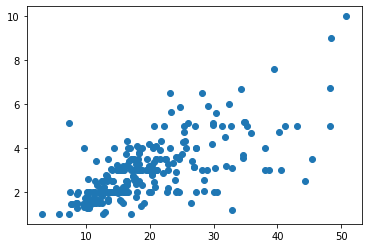

In [4]:
plt.scatter(tips['total_bill'],tips['tip'])
# 둘이 비례한다.

### 2.2. 요일 구분
* total_bill에 따른 tip의 분포 - 색상으로 요일 표시

'Sun':'red', 'Sat':'blue', 'Thur':'green', 'Fri':'yellow'

In [5]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

#### 2.2.1. 요일별 서브셋 만들기

In [8]:
tips_Sun= tips[tips['day']=='Sun']
tips_Sat= tips[tips['day']=='Sat']
tips_Thur= tips[tips['day']=='Thur']
tips_Fri= tips[tips['day']=='Fri']

#### 2.2.2. 시각화하기

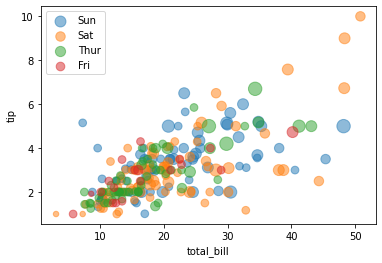

In [18]:
plt.scatter(tips_Sun['total_bill'],tips_Sun['tip'],label='Sun', 
            s=tips_Sun['size']*30, alpha=0.5) # 사이즈 컬럼 별로 점의 크기가 생성

plt.scatter(tips_Sat['total_bill'],tips_Sat['tip'],label='Sat', 
            s=tips_Sat['size']*30, alpha=0.5)

plt.scatter(tips_Thur['total_bill'],tips_Thur['tip'],label='Thur', 
            s=tips_Thur['size']*30, alpha=0.5)

plt.scatter(tips_Fri['total_bill'],tips_Fri['tip'],label='Fri', 
            s=tips_Fri['size']*30, alpha=0.5)
plt.legend()
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()
# 토요일에 많다.

### 2.3. seaborn으로 그리기
* sns.scatterplot(data=데이터프레임, x=x축 컬럼, y=y축 컬럼)

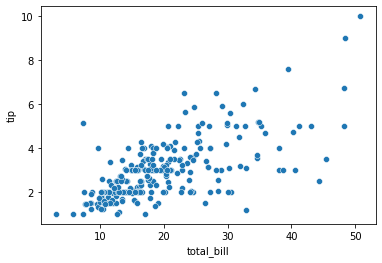

In [19]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

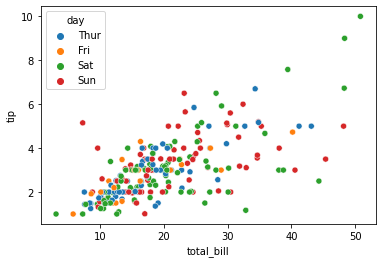

In [20]:
# 요일별 색 지정
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')

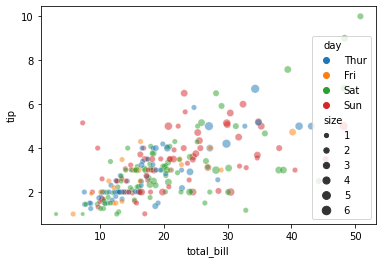

In [26]:
# size별 크기 지정
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', size='size', alpha=0.5)
plt.show()

# 데이터의 추세를 표현하는 lineplot

## 1. 샘플데이터

In [27]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [28]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [30]:
flights.shape

(144, 3)

In [31]:
# 연도별 데이터 수
flights['year'].value_counts()
# 1년에 12월 모두 누락 없이 들어감

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [32]:
# 월별 데이터 수
flights['month'].value_counts()
# 12년간 12개월 모두 누락 없이 들어감

Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: month, dtype: int64

## 2. 연도별 승객수의 변화

### 2.1. matplotlib으로 시각화
* plt.plot(x,y)

#### 2.1.1. 데이터 가공

In [35]:
flights_year = flights.groupby('year')['passengers'].sum()
flights_year

# 연도별 승객수의 합

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

#### 2.1.2. 시각화

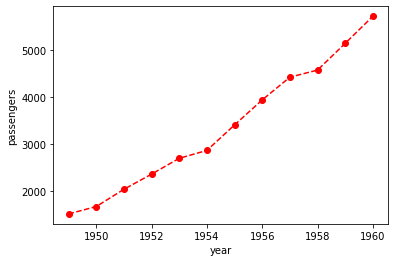

In [38]:
plt.plot(flights_year ,'ro--')
plt.xlabel('year')
plt.ylabel('passengers')
plt.show()

### 2.2. seaborn으로 시각화
* sns.lineplot(data=데이터 프레임, x=x축칼럼, y=y축칼럼, estimator=통계함수) (estimator 생략시 평균)
* 전체 데이터로 차트를 그리면 신뢰구간을 표시한다.

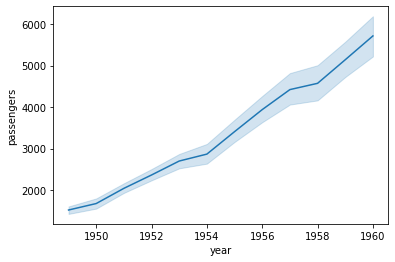

In [44]:
sns.lineplot(data=flights, x='year', y='passengers', estimator='sum')
plt.show()

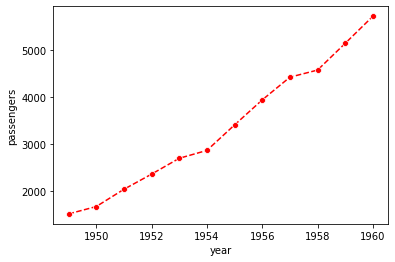

In [45]:
sns.lineplot(data=flights, x='year', y='passengers',estimator='sum', ci=None,
             color='r', marker='o', ls='--')
plt.show()


## 3. 연도-월별 승객수의 변화

### 3.1. matplotlib으로 시각화

#### 3.1.1. 데이터 가공

In [50]:
flights_pivot = flights.pivot_table(index='year',columns='month', values='passengers')
flights_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


#### 3.1.2. 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


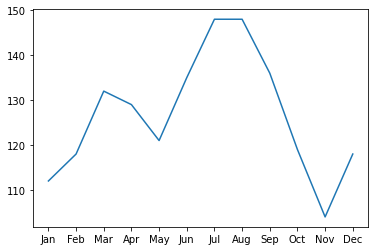

In [63]:
plt.plot(flights_pivot.iloc[0])

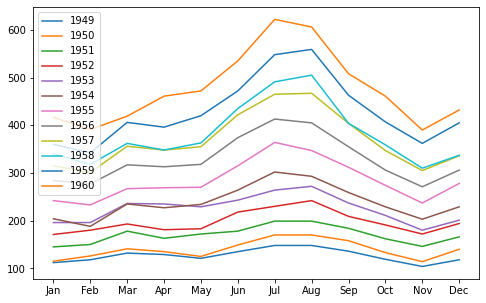

In [59]:
plt.figure(figsize=(8,5))
for i in range(0,12):
    plt.plot(flights_pivot.iloc[i], label=flights_pivot.index[i])

plt.legend()
plt.show()

### 3.2. seaborn으로 시각화

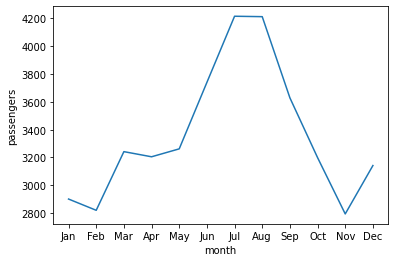

In [61]:
sns.lineplot(data=flights, x='month', y='passengers', estimator='sum',ci=None)
plt.show()
# 모든 연도의 월별 승객수 합

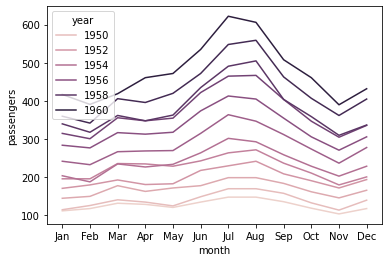

In [62]:
sns.lineplot(data=flights, x='month', y='passengers', estimator='sum',ci=None,
             hue='year')
plt.show()